# In this tutorial we would set up the notebook and do some preliminary data analysis before we jump into modeling (classification) in the following tutorial 

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
from os.path import join
import os

Download data from https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

We store data in our current directory directory and retrieve the path using the following command

In [12]:
path = os.getcwd()

In [21]:
df_message = pd.read_csv(join(path,'smsspamcollection/SMSSpamCollection'),sep='\t', quoting=csv.QUOTE_NONE,
                           names=["label", "message"])

Total number of records we do have is:

In [22]:
len(df_message)

5574

Lets have a quick look at the first 10 messages

In [23]:
df_message[0:10]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


A quick look per label gives us some more insight

In [24]:
df_message.groupby('label').describe()

message
label                                                          
ham   count                                                4827
      unique                                               4518
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

Let us also compute the length of each message and plot the distribution

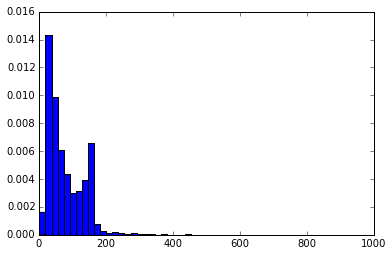

In [30]:
df_message['MessageLength'] = [len(x) for x in df_message['message'].tolist()]
plt.hist(df_message['MessageLength'], bins = 50, normed = True)
plt.xlabel('')
plt.show()

More statistics about the message length:

In [32]:
df_message['MessageLength'].describe()

count    5574.000000
mean       80.604593
std        59.919970
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: MessageLength, dtype: float64

How do the label distribution change for spam and ham

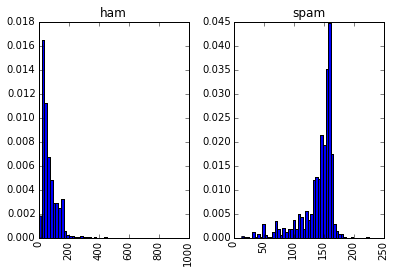

In [35]:
df_message.hist(column='MessageLength', by='label', bins=50, normed = True)
plt.show()

Now we would use textblob package from python to perform some text mining. We convert each message into a set of lemmas i.e. in the canonical form, dictionary form, or citation form.

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sroy/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
def split_into_lemmas(message):
    message = unicode(message, 'utf8').lower()
    words = TextBlob(message).words
    return [word.lemma for word in words]

You can use this function on the dataframe column. The following prints the words from the first message

In [50]:
df_message['message'].apply(split_into_lemmas)[0]

[u'go',
 u'until',
 u'jurong',
 u'point',
 u'crazy',
 u'available',
 u'only',
 u'in',
 u'bugis',
 u'n',
 u'great',
 u'world',
 u'la',
 u'e',
 u'buffet',
 u'cine',
 u'there',
 u'got',
 u'amore',
 u'wat']

What about plotting a nice word cloud

In [67]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [61]:
words = ' '.join(df_message['message'])

Remove URLs, RTs etc

In [68]:
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

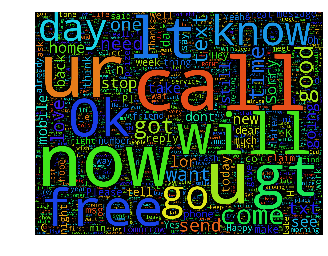

In [70]:
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      max_words=2000,
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

For interested learners I suggest to look into topic modeling for doing further analysis. A good resource can be found at 
https://www.cs.princeton.edu/~blei/topicmodeling.html